# k近傍法による異常検知

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import seaborn as sns
sns.set()
import japanize_matplotlib
sns.set(font="IPAexGothic")

In [2]:
# load data

df = pd.read_csv('chfdb_chf01_275.csv',header = None)

df

,0,1,2
0,275.000,-0.645,0.665
1,275.004,-0.635,0.710
2,275.008,-0.645,0.745
3,275.012,-0.635,0.760
4,275.016,-0.645,0.785
...,...,...,...
3746,289.984,-0.440,-0.070
3747,289.988,-0.445,-0.045
3748,289.992,-0.435,-0.070
3749,289.996,-0.445,-0.060


In [3]:
type(df.index)

pandas.core.indexes.range.RangeIndex

(array([-4., -3., -2., -1.,  0.,  1.,  2.]),
 <a list of 7 Text yticklabel objects>)

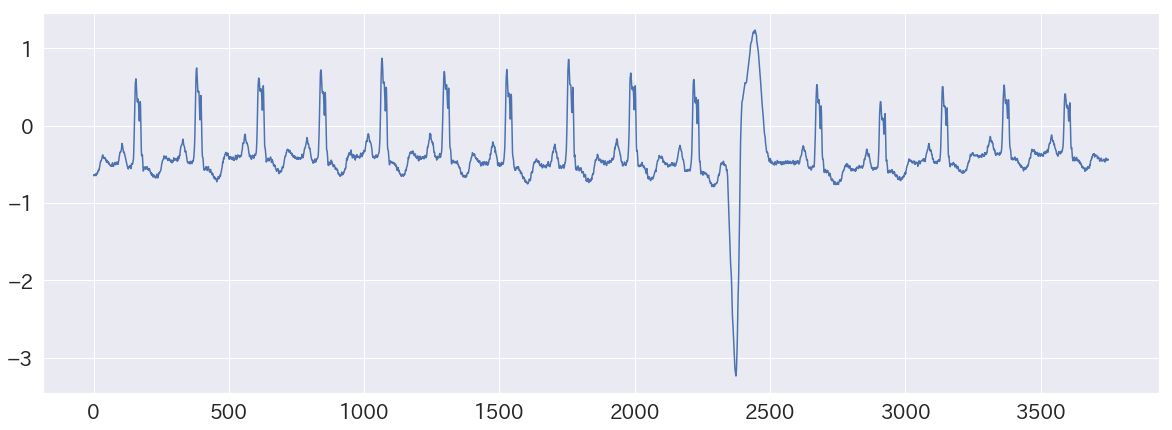

In [4]:
# 心電図のデータその１
plt.figure(figsize=(20,7))

plt.plot(df[1],label = "1",color="b")
# plt.plot(dau_grou["user_id"][:"2019-09-01"],label = "アクティブユーザー数",color="k")
# plt.ylabel("アクション回数（回）", fontsize=24)
plt.xticks(fontsize=20 )
plt.yticks(fontsize=20 )
#plt.yscale('log')

(array([-4., -3., -2., -1.,  0.,  1.,  2.]),
 <a list of 7 Text yticklabel objects>)

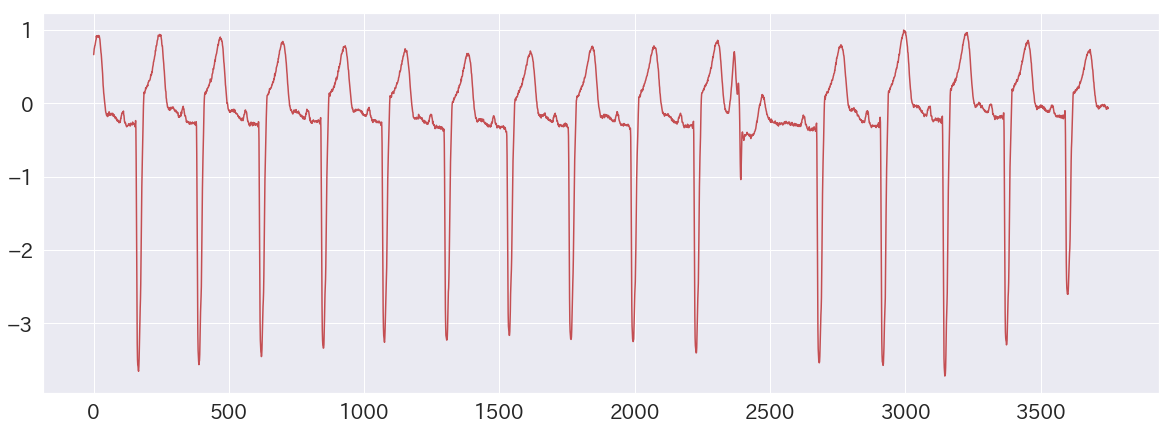

In [5]:
# 心電図のデータその2
plt.figure(figsize=(20,7))

plt.plot(df[2],label = "1",color="r")
# plt.plot(dau_grou["user_id"][:"2019-09-01"],label = "アクティブユーザー数",color="k")
# plt.ylabel("アクション回数（回）", fontsize=24)
plt.xticks(fontsize=20 )
plt.yticks(fontsize=20 )
#plt.yscale('log')

In [6]:
# 2のデータを使って訓練を行う
# 訓練データ
train_data = df[df.index<=1499][2]

# 検証データ
test_data = df[(df.index>1499) & (df.index<3500)][2]

In [7]:
test_data

1500   -0.320
1501   -0.315
1502   -0.345
1503   -0.345
1504   -0.335
        ...  
3495   -0.055
3496   -0.040
3497   -0.060
3498   -0.040
3499   -0.035
Name: 2, Length: 2000, dtype: float64

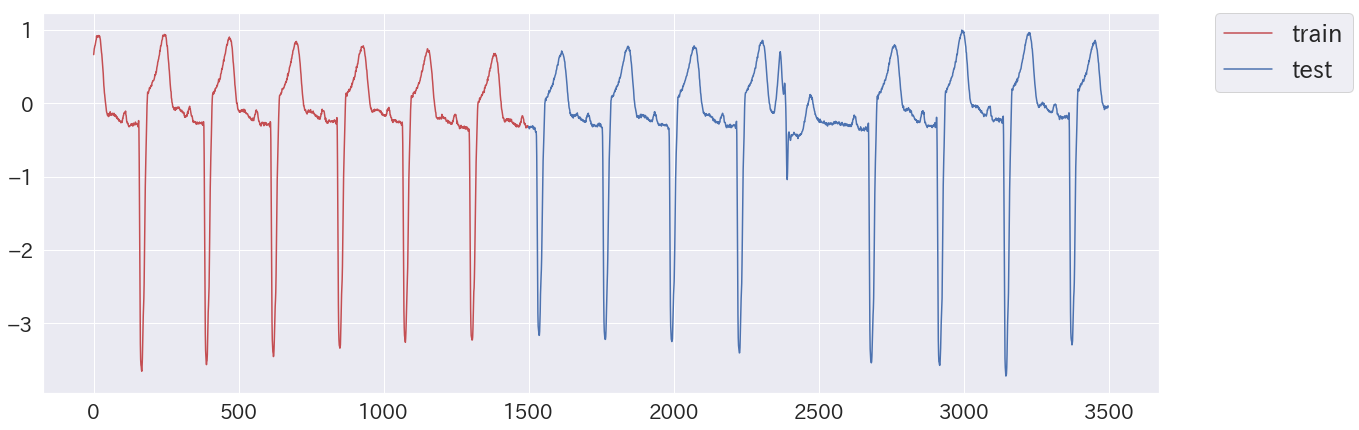

In [8]:
# 心電図のデータその2の訓練データと検証データを可視化
plt.figure(figsize=(20,7))

plt.plot(train_data ,label = "train",color="r")
plt.plot(test_data ,label = "test",color="b")
# plt.plot(dau_grou["user_id"][:"2019-09-01"],label = "アクティブユーザー数",color="k")
# plt.ylabel("アクション回数（回）", fontsize=24)
plt.xticks(fontsize=20 )
plt.yticks(fontsize=20 )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=24)

In [9]:
print(train_data.size)
print(test_data.size)

1500
2000


In [10]:
# 窓幅
width = 100

# K近傍法のk
nk = 5

In [56]:
# ベクトルの集合作成用の関数

def embed(lst, dim):
    emb = np.empty((0,dim), float)
    for i in range(lst.size - dim + 1):
        tmp = np.array(lst[i:i+dim]).reshape((1,100)) 
        emb = np.append(emb, tmp, axis=0)
    return emb

In [57]:
# 窓幅を使ってベクトルの集合を作成
# train_dataとtest_dataのサイズがwidthで割り切れないといけないことに注意
train = embed(train_data, width)
test = embed(test_data, width)

In [65]:
train_data

0       0.665
1       0.710
2       0.745
3       0.760
4       0.785
        ...  
1495   -0.325
1496   -0.305
1497   -0.305
1498   -0.315
1499   -0.320
Name: 2, Length: 1500, dtype: float64

In [66]:
# trainには一時点ずつずらしたデータが入っている
train

array([[ 0.665,  0.71 ,  0.745, ..., -0.25 , -0.26 , -0.23 ],
       [ 0.71 ,  0.745,  0.76 , ..., -0.26 , -0.23 , -0.205],
       [ 0.745,  0.76 ,  0.785, ..., -0.23 , -0.205, -0.205],
       ...,
       [ 0.34 ,  0.28 ,  0.24 , ..., -0.325, -0.305, -0.305],
       [ 0.28 ,  0.24 ,  0.2  , ..., -0.305, -0.305, -0.315],
       [ 0.24 ,  0.2  ,  0.125, ..., -0.305, -0.315, -0.32 ]])

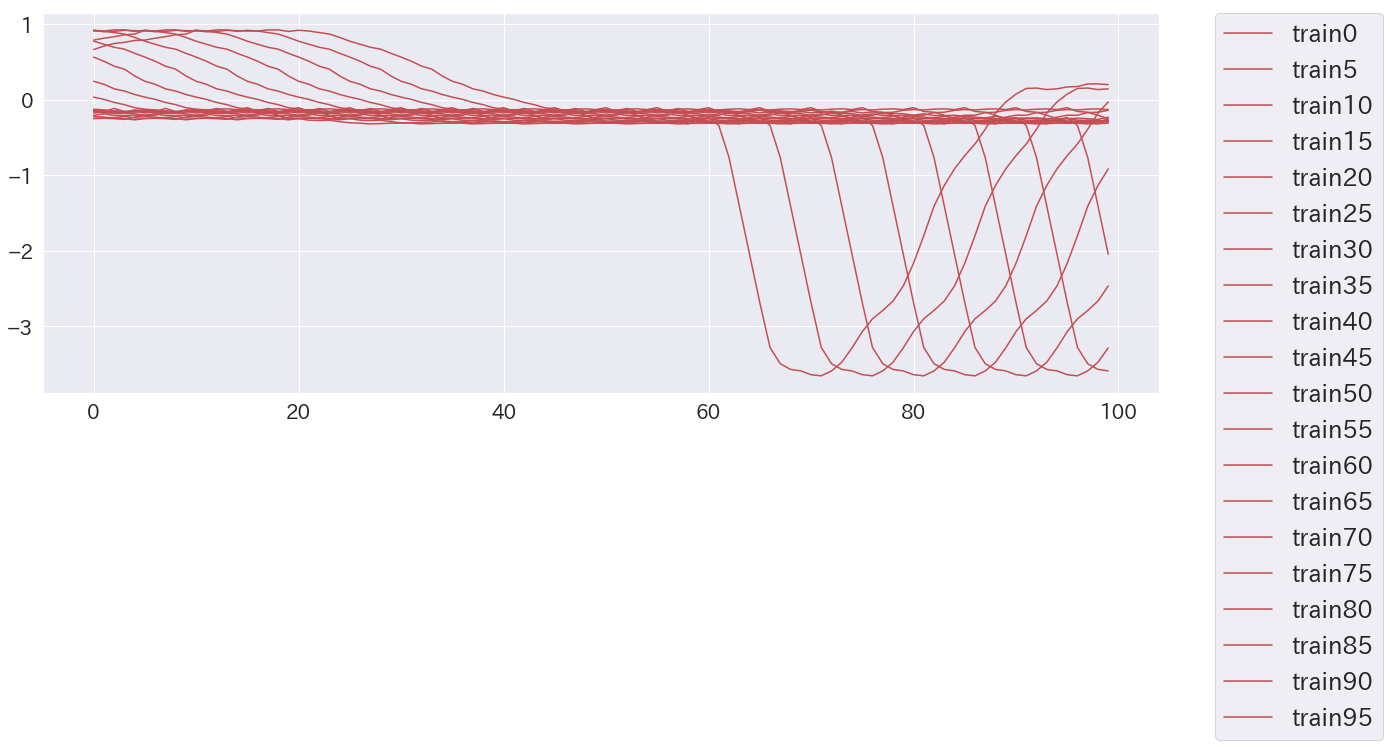

In [71]:
# trainの中身を可視化
plt.figure(figsize=(20,7))

for i in range(0,99,5):
    plt.plot(train[i] ,label = "train"+str(i),color="r")

plt.yticks(fontsize=20 )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=24)

In [60]:
# 訓練データで学習する
neigh = NearestNeighbors(n_neighbors=nk)
neigh.fit(train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [61]:
# テストデータの距離を計算する
d = neigh.kneighbors(test)[0]

In [62]:
# 距離をmax1にするデータ整形
mx = np.max(d)
d = d / mx

In [63]:
d

array([[0.20300738, 0.21882686, 0.26613494, 0.29102172, 0.30518643],
       [0.20156238, 0.21916158, 0.26591722, 0.29022769, 0.30536429],
       [0.20056769, 0.2190955 , 0.26694978, 0.28966589, 0.30555094],
       ...,
       [0.10930378, 0.12362447, 0.12399724, 0.1253618 , 0.12712522],
       [0.10944444, 0.12460878, 0.12463783, 0.12616772, 0.12801197],
       [0.11070232, 0.1256142 , 0.12627526, 0.12630392, 0.12934117]])

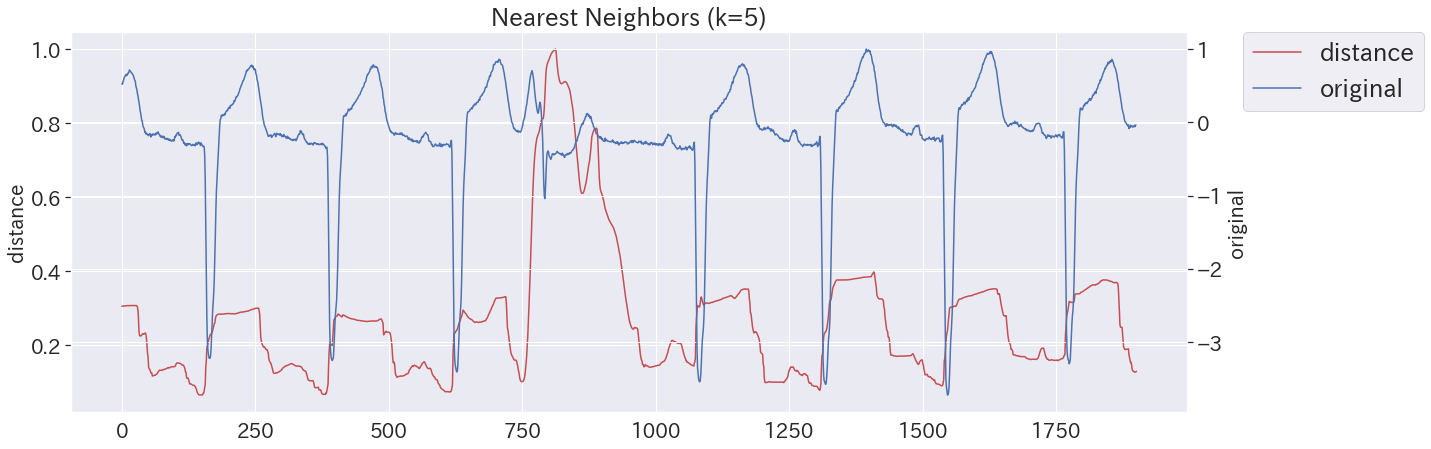

In [64]:
    # 検証データの原系列と距離をプロット
    test_for_plot = df[(df.index>1499+width) & (df.index<3500)][2]
    fig = plt.figure(figsize=(20,7))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    
    # 最近傍５個目の点までの距離をプロット
    p1, = ax1.plot(d[:,4], '-r')
    ax1.set_ylabel('distance',fontsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    #ax1.set_ylim(0, 1.2)
    p2, = ax2.plot(test_for_plot.reset_index(drop=True), '-b')
    ax2.set_ylabel('original',fontsize=20)
    ax2.tick_params(axis='y', labelsize=20)
    #ax2.set_ylim(0, 12.0)
    plt.title("Nearest Neighbors (k=5)",fontsize=24)
    ax1.legend([p1, p2], ["distance", "original"],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=24)